### 1) N dimension array의 속성
- 이후 GPU특화 컨테이너인 Tensor와 유사
- 그 특성인 크기(shape), 내부 데이터 타입(dtype)이 중요
- 이후 통상적인 Tensor.shape = (B, C, H, W) 확인에 핵심 역할
- 또한 스칼라값을 dtype = .long() / .int()로 변환할때 또한 핵심

In [1]:
import numpy as np

a = np.array([1,2,3], dtype=np.float32)

print(a.shape)
print(a.dtype)

(3,)
float32


### 2) 벡터화 연산 및 BoardCasting
- 행렬 내부 연산에 대해 for문 없이 연산가능
- 행렬간 연산시, 크기가 다를 경우 자동으로 크기를 맞춤 = Board Casting

In [4]:
batch = np.array([[1,2,3],
                  [4,5,6],
                  [7,8,9]])
# (3,3)
bias = np.array([10,20,30])
# (3,)
batch+bias
# (3,3) + (3,)*3 >> 행 복사

array([[11, 22, 33],
       [14, 25, 36],
       [17, 28, 39]])

In [6]:
batch*bias
# (3,3) * (3,)*3 >> 행 복사

array([[ 10,  40,  90],
       [ 40, 100, 180],
       [ 70, 160, 270]])

### 3) 집계함수(Aggregation Function)
- array, tensor내부에 대해 집계된 값에 대한 수치를 계산하는 함수
> np.sum(): 모든 요소의 합  
> np.mean(): 모든 요소의 평균  
> np.max()/np.min(): 요소들중 최대/최소 값  
> np.std()/np.var(): 요소들의 표준편차/분산

In [9]:
# mse(평균 제곱 오차)로 mean사용함
pred = np.array([0.2, 0.7, 0.1])
target = np.array([0, 1, 0])

error = (pred-target)**2
mse_loss = np.mean(error)

print(mse_loss)

0.04666666666666668


### 4) 집계함수 사용시 axis 택하여 계산
- (axis = 0): 같은 Feature(같은 column)상에서 집계 계산
- (axis = 1): 같은 Batch(같은 row)상에서 집계 계산

In [12]:
X = np.array([[10, 20, 30],
              [40, 50, 60]])

feature_max = np.max(X, axis=0)
batch_max = np.max(X, axis=1)
# max_value
print(feature_max)
print(batch_max)

[40 50 60]
[30 60]


### 5) Boolean Indexing: 조건을 통해 원하는 값만 출력
- T/F masking 진행 -> 이상치 제거, 임계값 분류등에서 사용

In [13]:
data = np.array([10, -5, 30, -2, 15])

filtered = data[data>0]
print(filtered)

[10 30 15]


### 6) Matplotlib: 기본 시각화 라이브러리
- 입력을 numpy배열로 받아 그래프 생성

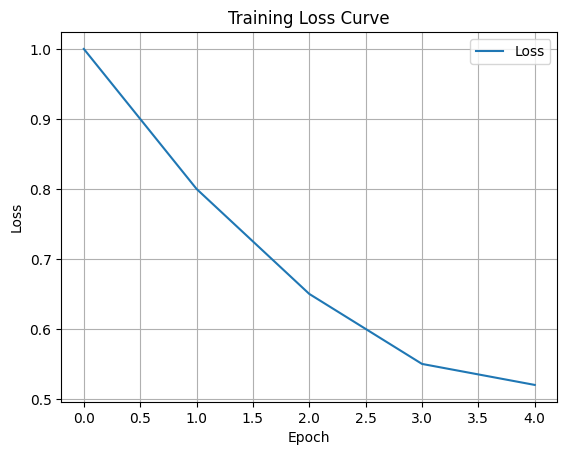

In [15]:
import matplotlib.pyplot as plt

loss = [1.0, 0.8, 0.65, 0.55, 0.52]

plt.plot(loss, label="Loss")
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

### 7) 보조 코드 모음

- np.zeros(), np.ones(): 특정 값으로 배열 초기화

In [16]:
z = np.zeros((2,3))
o = np.ones((2,3))

print(z)
print(o)

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]


- np.arange(), np.linspace(): 범위 및 수열 생성

In [17]:
a = np.arange(0, 10, 2) # (start, stop, step) -> step기반 수열 생성
b = np.linspace(0, 10, 5) # (start, stop, count) -> count(개수)기반 수열 생성

print(a)
print(b)

[0 2 4 6 8]
[ 0.   2.5  5.   7.5 10. ]


- Scatter Plot: 데이터 관계(상관/군집/이상치) 확인시 사용

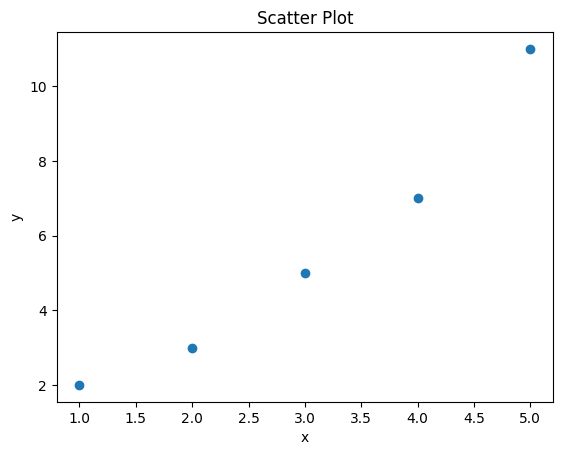

In [18]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 7, 11])

plt.scatter(x, y)
plt.title("Scatter Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()